In [1]:
import json

In [2]:
j = json.load(open(
    'testData/3cf80417-bd75-4f81-bb56-713970f1cfb2.json')
)

In [3]:
j['metadata']

{'baseRate': 0.1,
 'parameters': {'baseRate': 0.1,
  'fprMutationMagnitude': 0.05,
  'fprMutationRate': 0.8},
 'policy': 'PUBLICATIONS',
 'syncEvery': 2000}

In [4]:
j.keys()

dict_keys(['metadata', 'funds', 'falsePositiveRate', 'nPublications'])

In [5]:
fpr = np.array(j['falsePositiveRate'])
fpr.shape

(10, 500, 100)

In [6]:
fpr.mean(axis=-1).shape

(10, 500)

In [9]:
m = fpr.mean(axis=(0,2))

In [10]:
m.shape

(500,)

Text(0.5,0.5,"{'baseRate': 0.1, 'syncEvery': 2000, 'policy': 'PUBLICATIONS', 'parameters': {'baseRate': 0.1, 'fprMutationMagnitude': 0.05, 'fprMutationRate': 0.8}}")

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


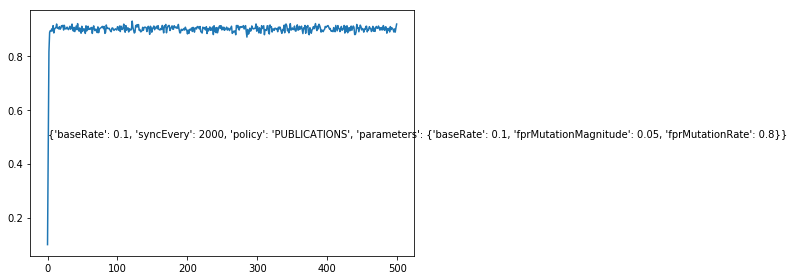

In [12]:
plt.plot(m)
plt.text(0.5, 0.5, j['metadata'])